Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Equalização por histograma

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/



In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

figsize = (10, 10)


# Lendo a imagem de entrada


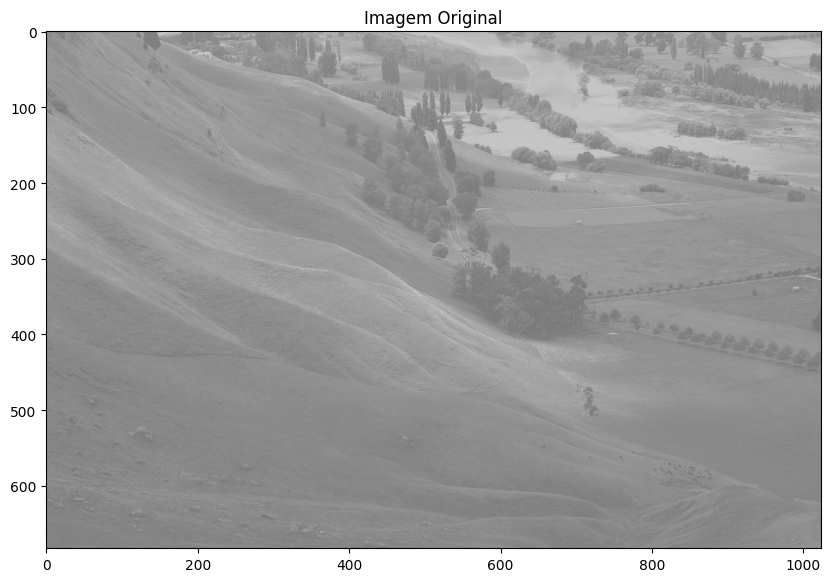

In [16]:
# read as grayscale
img = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg", 0)

plt.figure(figsize=figsize)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()


# Iniciamos calculando e mostrando o histograma original

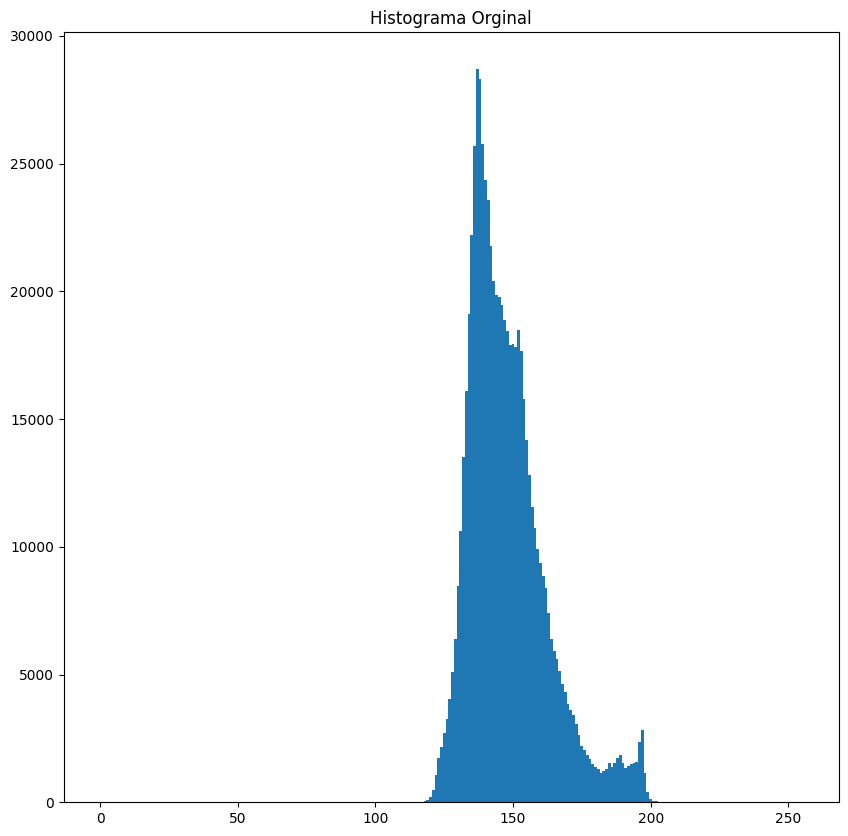

In [17]:
intervalo_min_max = [0, 256]
num_pontos = 256
point_count, point_edges = np.histogram(img, num_pontos, intervalo_min_max)
point_start = point_edges[:-1]

def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # por que não usar plt.hist? porque queremos traçar também algumas derivações desse histograma
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(point_start, point_count)
plt.title("Histograma Orginal")
plt.show()

# Normalizamos o histograma
### Obs: PDF - Probability Density Function

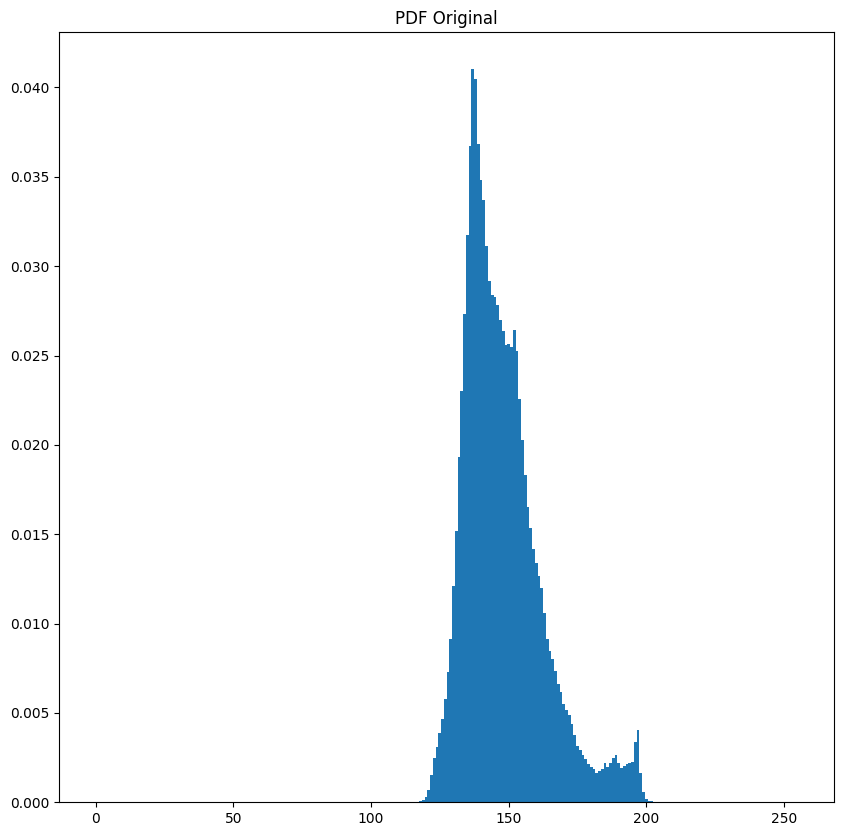

In [18]:
pdf = point_count / np.sum(point_count)

draw_hist(point_start, pdf)
plt.title("PDF Original")
plt.show()



# Obtemos o CDF calculando a soma acumulada do dados da PDF
### Obs: CDF - Cumulative Density Function

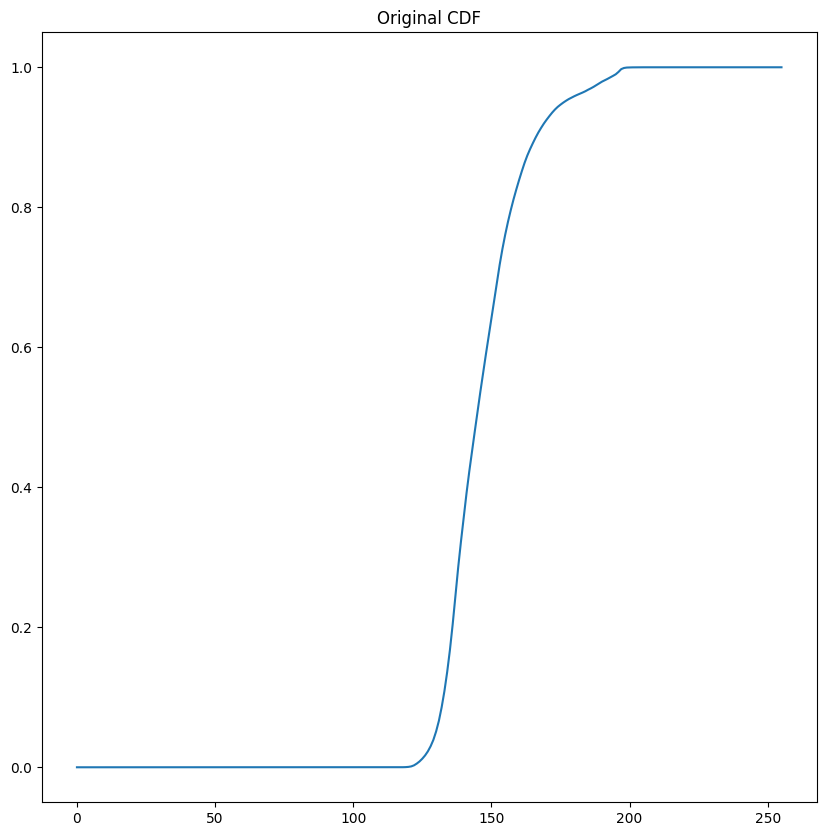

In [19]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()



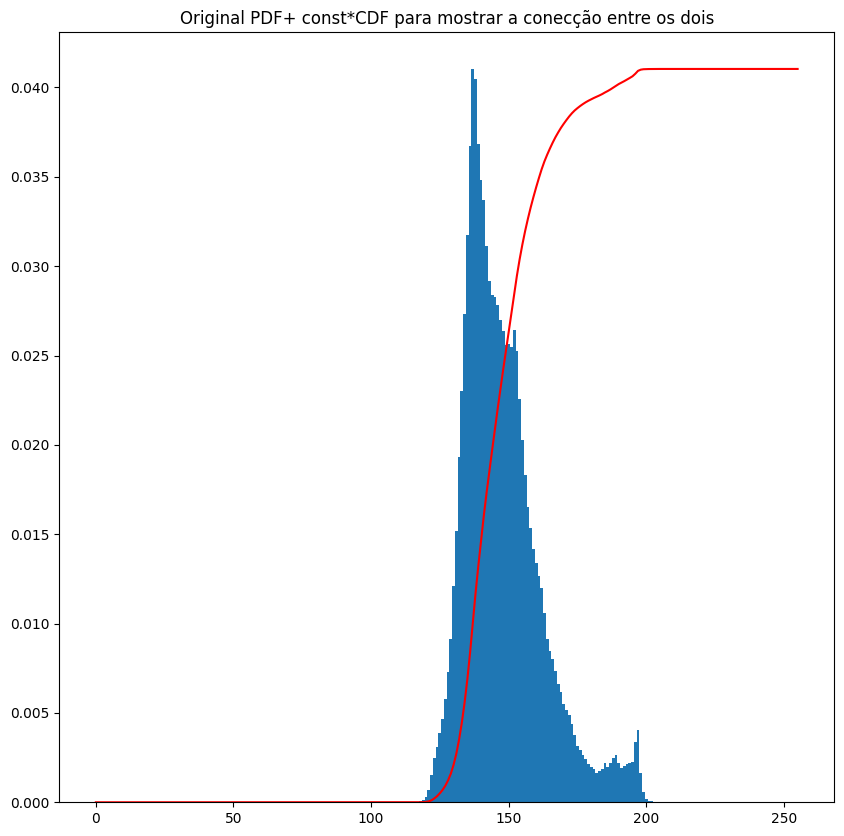

In [20]:
fig, ax = draw_hist(point_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF para mostrar a conecção entre os dois")
plt.show()



# O último passo é "desnormalizar" a CDF para torna-lá a função de equalização


In [21]:
f_eq = np.round(cdf * 255).astype(int)
f_eq

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   1,   2,   3,   4,   6,   8,  10,
        13,  17,  22,  28,  35,  43,  52,  63,  73,  82,  91, 100, 108,
       115, 122, 130, 137, 144, 150, 157, 163, 170, 177, 183, 189, 194,
       199, 203, 207, 210, 214, 217, 220, 223, 225, 227, 229, 231, 233,
       235, 236, 237, 238, 240, 241, 241, 242, 243, 243, 244, 24

# Usamos a função de equalização para pegar a imagem equalizada


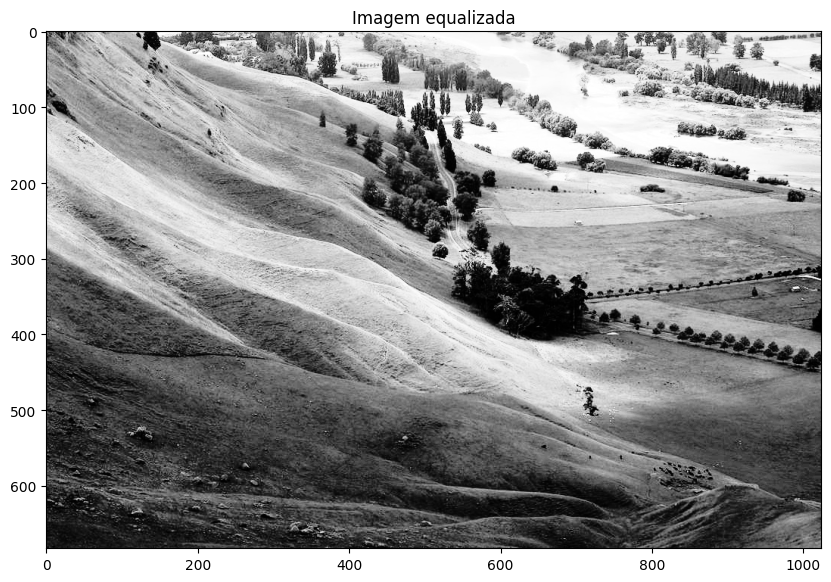

In [22]:
img_eq = f_eq[img]

plt.figure(figsize=figsize)
plt.imshow(img_eq, cmap="gray", vmin=0, vmax=255)
plt.title("Imagem equalizada")
plt.show()



# Plotamos o histograma equalizada, PDF e CDF

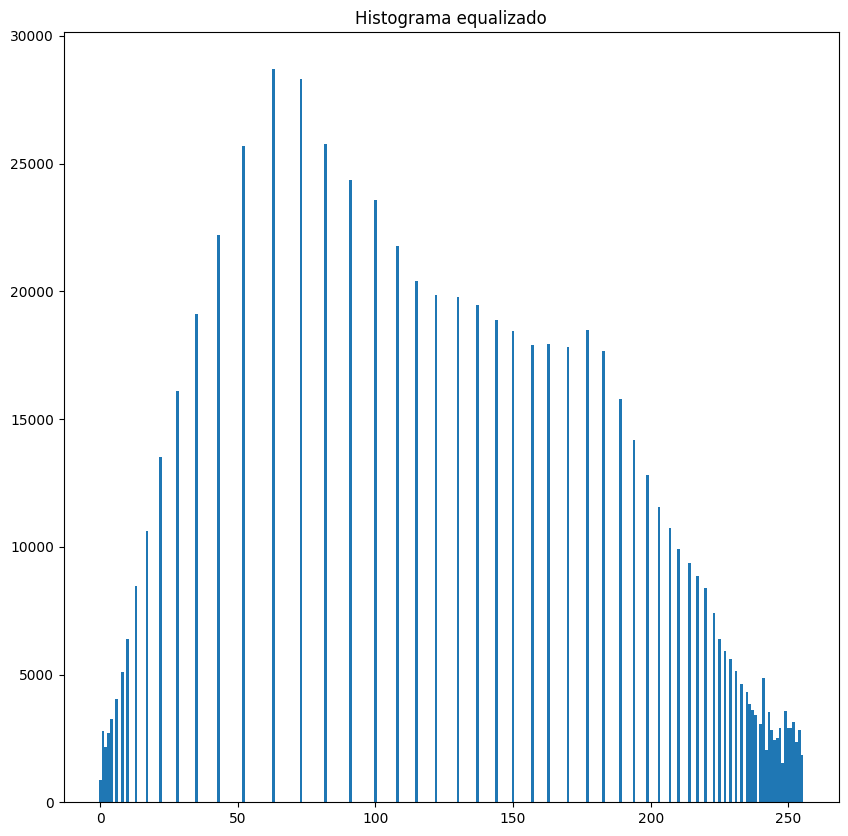

In [23]:
bin_count, bins_edges = np.histogram(img_eq, num_pontos, intervalo_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("Histograma equalizado")
plt.show()



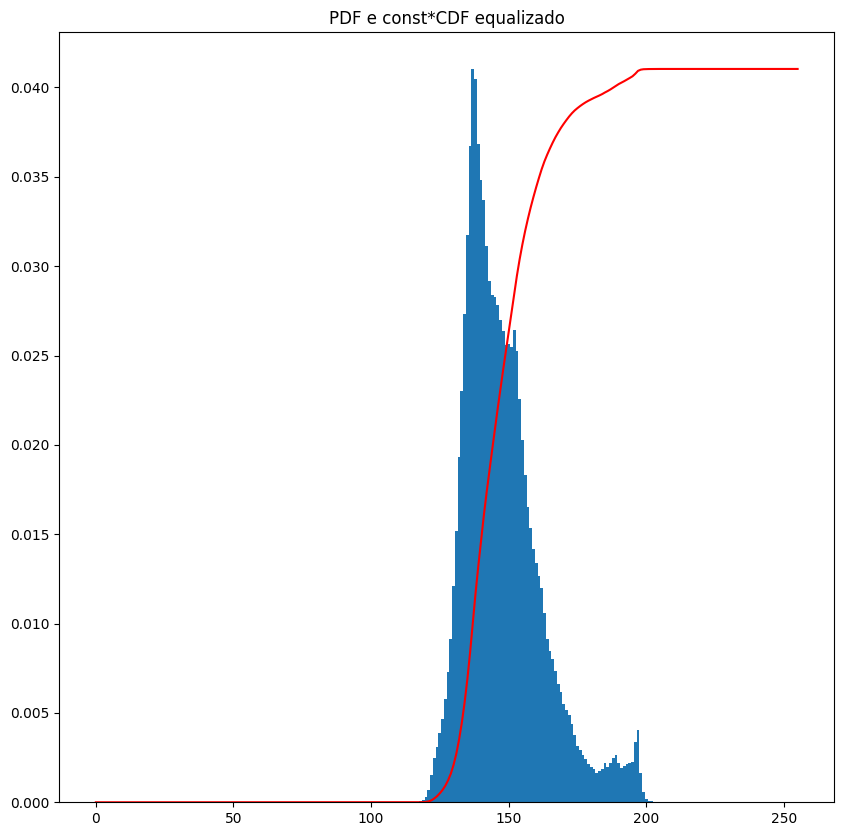

In [24]:
pdf = point_count / np.sum(point_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(point_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("PDF e const*CDF equalizado")
plt.show()



## Função de equalização da cv2


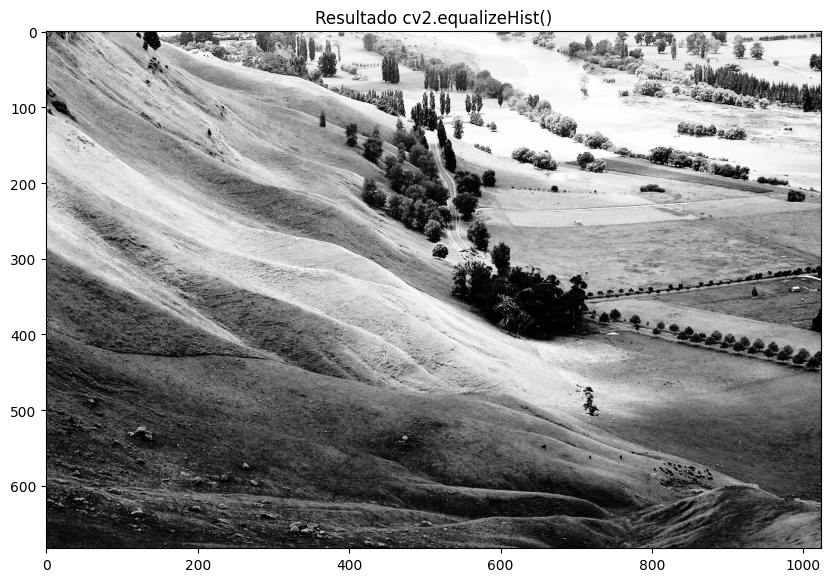

In [25]:
img_eq_cv2 = cv2.equalizeHist(img)

plt.figure(figsize=figsize)
plt.imshow(img_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("Resultado cv2.equalizeHist()")
plt.show()

